In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn import cluster, datasets, preprocessing, metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [7]:
# Check out the dataset and our target values
df = pd.read_csv("iris.csv")
print(df['Name'].value_counts())
df.head(5)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Name, dtype: int64


,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


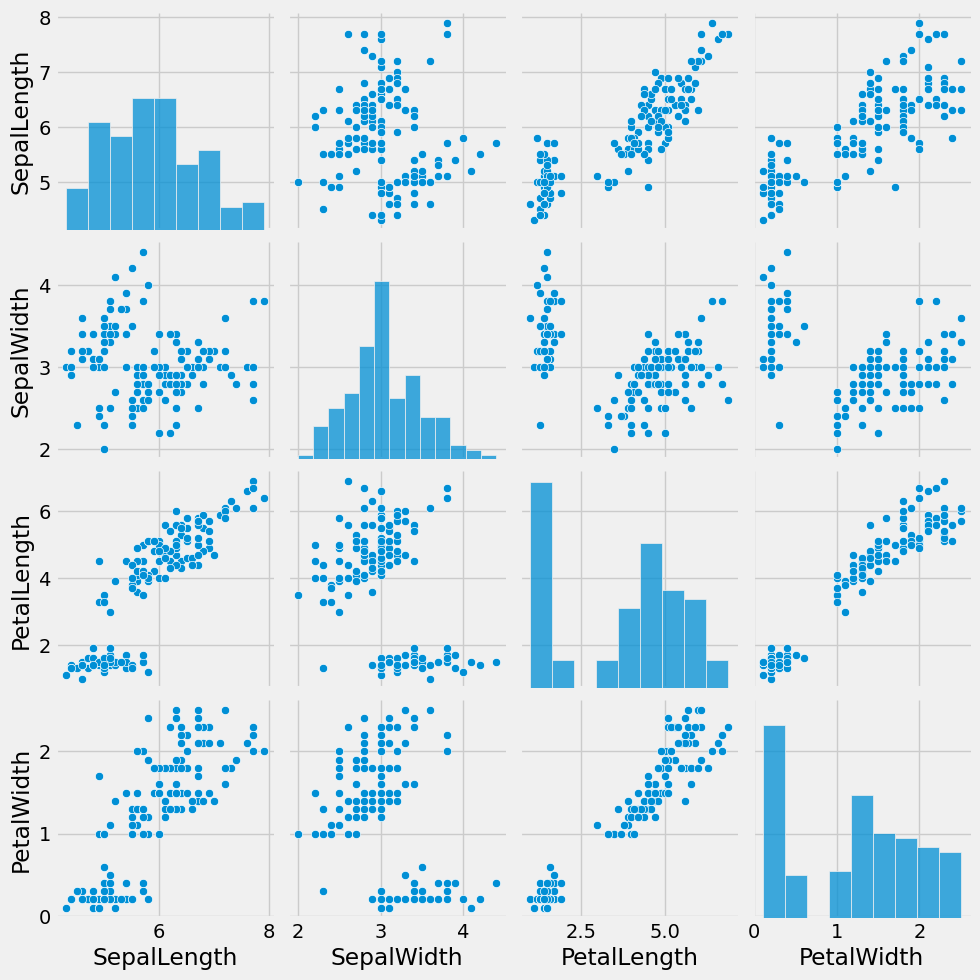

In [9]:
cols = df.columns[:-1]
sns.pairplot(df[cols])
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

In [20]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=3)

In [21]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_

In [22]:
print(labels,centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2] [[0.70726496 0.4508547  0.79704476 0.82478632]
 [0.19611111 0.59083333 0.07864407 0.06      ]
 [0.44125683 0.30737705 0.57571548 0.54918033]]


In [23]:
metrics.silhouette_score(X_scaled, labels, metric='euclidean')

0.5043188549150883

In [24]:
score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  score.append(metrics.silhouette_score(X_scaled, labels, metric='euclidean'))

Text(0, 0.5, 'Score')

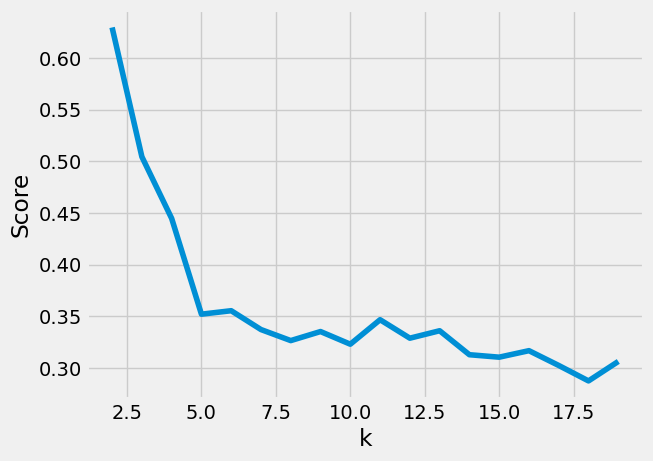

In [25]:
plt.plot(list(range(2,20)),score)
plt.xlabel('k')
plt.ylabel('Score')

In [26]:
inertia_score=[]
for k in range(2,20):
  kmeans = cluster.KMeans(n_clusters=k)
  kmeans.fit(X_scaled)
  labels = kmeans.labels_
  centroids = kmeans.cluster_centers_
  inertia = kmeans.inertia_
  inertia_score.append(inertia)

Text(0, 0.5, 'Inertia')

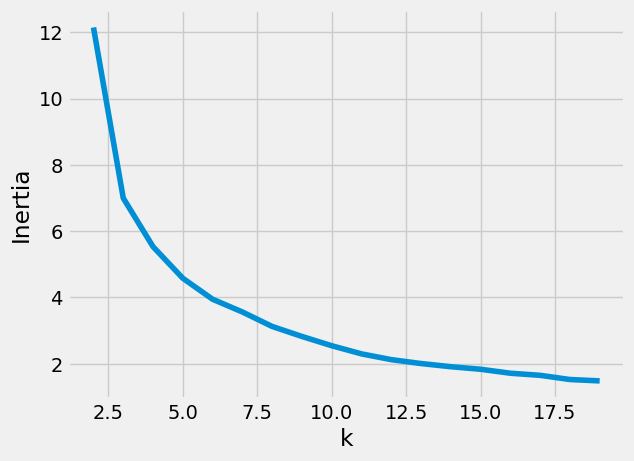

In [27]:
plt.plot(list(range(2,20)),inertia_score)
plt.xlabel('k')
plt.ylabel('Inertia')

In [28]:
df['label'] = labels
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name,label
0,5.1,3.5,1.4,0.2,Iris-setosa,2
1,4.9,3.0,1.4,0.2,Iris-setosa,8
2,4.7,3.2,1.3,0.2,Iris-setosa,8
3,4.6,3.1,1.5,0.2,Iris-setosa,8
4,5.0,3.6,1.4,0.2,Iris-setosa,2


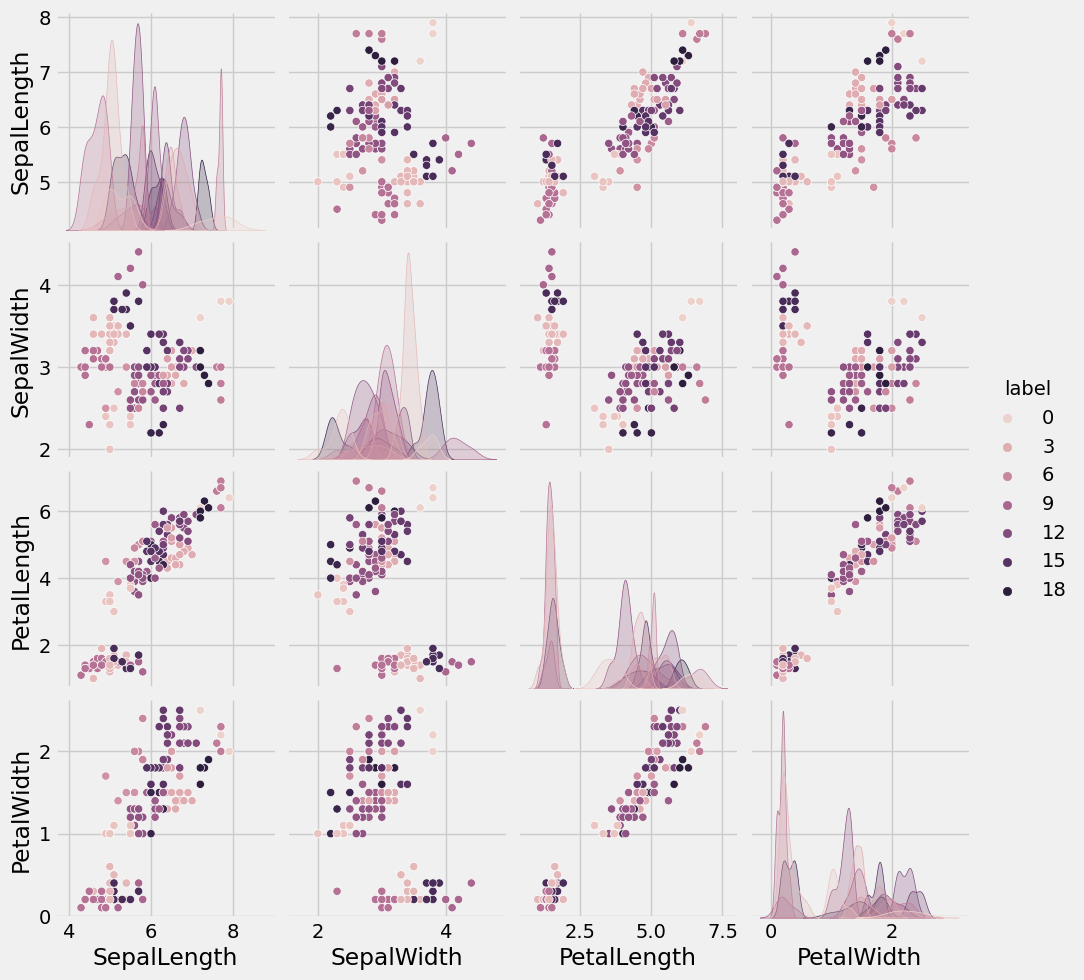

In [29]:
cols = df.columns[:-2]
sns.pairplot(df, x_vars=cols, y_vars= cols, hue='label')